In [1]:
import numpy as np
import pandas as pd 
import re
import itertools
import unicodedata 
import warnings

from janome.tokenizer import Tokenizer
import networkx as nx 
from scipy.spatial import distance #distance f(x)'s
import matplotlib.pyplot as plt

In [2]:
#inline matplotlib 
%matplotlib inline


In [32]:
df = pd.read_csv("myboysuga.csv")
df.columns
df.tail()

,date,time,username,name,tweet,replies_count,retweets_count,likes_count
2181,2020-10-16,05:56:44,sugawitter,菅 義偉,政府の拉致問題対策本部は16日、北朝鮮による日本人拉致問題の啓発のため、動画投稿サイト「Yo...,566,6413,15246
2182,2020-10-02,14:36:06,sugawitter,菅 義偉,親愛なるトランプ大統領へ、 貴大統領とメラニア夫人がコロナに感染したとのツイートを見て心配し...,554,3514,17605
2183,2020-09-21,03:02:12,sugawitter,菅 義偉,こんばんは。 事務所スタッフです。 本日、菅が秘書を務めていた故・小此木彦三郎衆議院議員の...,531,925,8890
2184,2020-09-18,05:07:47,sugawitter,菅 義偉,Deeply touched by so many warm messages of con...,308,911,4697
2185,2020-09-18,05:07:19,sugawitter,菅 義偉,私の@sugawitterに、各国首脳を始め多くの方々から心温まるお祝いのメッセージを頂きま...,932,2766,18979


In [23]:
#Split 
tweets = df['tweet'].to_numpy()
regex = u'[^\u3040-\u3093\u30A0-\u30FF\u4E00-\u9FFF]' #Match ひらがな，カタカナ，漢字 resp.

t = Tokenizer()

tweet_words = []
for tweet in tweets:
    tweet = re.sub(regex, ' ', tweet)
    words = []
    for token in t.tokenize(tweet):
        speechs = token.part_of_speech.split(',')
        if ('名詞' in speechs) or ('形容詞' in speechs):
            if len(token.surface) > 1:
                words.append(token.surface)
    tweet_words.append(words)

len(tweet_words)


2186

In [26]:
tweet_words[:4] #Testing of implementation, appended only to tweet_words if 名詞・形容詞

[['制約',
  '多い',
  '生活',
  'ご苦労',
  'おかけ',
  '行動',
  'こと',
  '感染',
  '大幅',
  '縮小',
  'こと',
  '協力',
  '国民',
  '皆様',
  'お願い'],
 ['新型',
  'コロナ',
  'ウイルス',
  '発生',
  '日本',
  '世界',
  'ウイルス',
  '闘い',
  '国民',
  '皆様',
  '不安',
  '解消',
  '早く',
  '安心',
  '暮らし',
  'ため',
  'すべて'],
 ['重層',
  'セーフティー',
  'ネット',
  '事業',
  '雇用',
  '暮らし',
  '困難',
  'ワクチン',
  '有効',
  '安全',
  '確認',
  '中旬',
  '接種',
  'スタート',
  '政府',
  '準備'],
 ['ここ',
  '感染',
  '減少',
  '傾向',
  '確か',
  'もの',
  '判断',
  '飲食',
  '時間',
  '短縮',
  '中心',
  'メリハリ',
  'これ',
  '対策',
  '徹底',
  'こと',
  '減少',
  '傾向',
  '継続',
  '入院',
  '重症',
  '減少',
  '自治体',
  '連携',
  '医療',
  '体制',
  '確保']]

In [54]:
word_count = {}
for words in tweet_words:
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
    
word_count_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'count': [v for v in word_cnt.values()]})



In [55]:
word_count_df.head()

,word,count
0,制約,7
1,多い,3
2,生活,7
3,ご苦労,3
4,おかけ,3


In [56]:
word_count_df.tail()

,word,count
2420,電気,1
2421,不安定,1
2422,不妊,1
2423,治療,1
2424,機構,1


In [58]:
word_count_df[['count']].describe()


,count
count,2425.000000
mean,9.815670
std,74.479771
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1727.000000


In [119]:
plt.rcParams['font.family'] = ['Hiragino Sans']


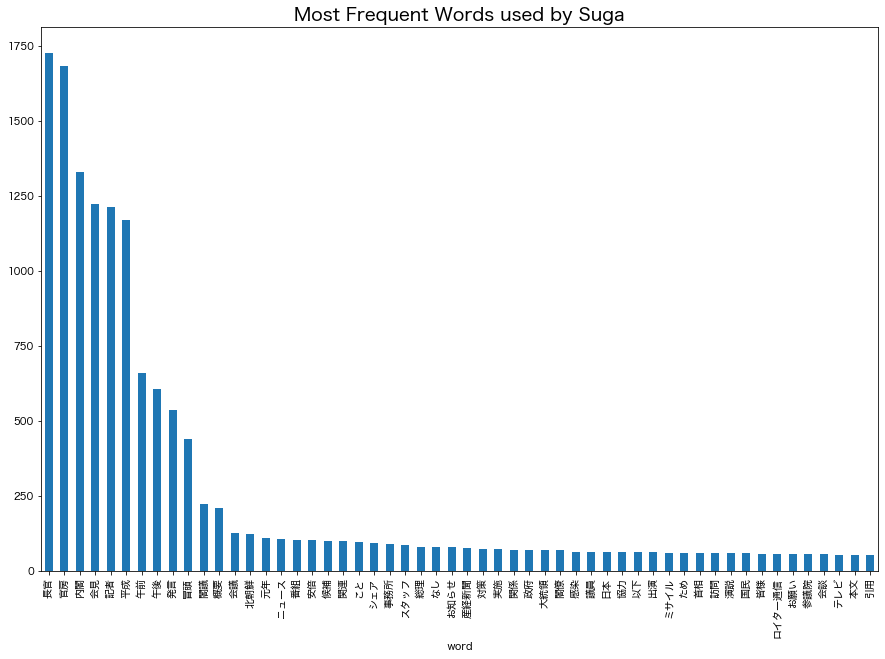

In [124]:
tmp = word_cnt_df[word_cnt_df['cnt'] > 50]
tmp.sort_values(by='cnt', ascending=False,).plot(kind='bar', x='word', y='cnt', figsize=(15,10), legend=False)
plt.title("Most Frequent Words used by Suga",  fontsize=18)
plt.show()


In [136]:
vocab = {}
target_words = word_cnt_df[word_cnt_df['cnt'] > 50]['word'].to_numpy()
for word in target_words:
    if word not in vocab:
        vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    


In [146]:
re_vocab

{0: 'こと',
 1: '感染',
 2: '協力',
 3: '国民',
 4: '皆様',
 5: 'お願い',
 6: '日本',
 7: 'ため',
 8: '政府',
 9: '対策',
 10: '内閣',
 11: '議員',
 12: '大統領',
 13: '会談',
 14: '関係',
 15: '北朝鮮',
 16: '演説',
 17: 'スタッフ',
 18: 'お知らせ',
 19: 'テレビ',
 20: '番組',
 21: '出演',
 22: '午前',
 23: '事務所',
 24: '実施',
 25: '午後',
 26: '総理',
 27: '以下',
 28: 'ニュース',
 29: '訪問',
 30: '記者',
 31: '会見',
 32: '首相',
 33: 'シェア',
 34: '安倍',
 35: '閣僚',
 36: '会議',
 37: '閣議',
 38: '概要',
 39: '官房',
 40: '長官',
 41: '元年',
 42: '参議院',
 43: '候補',
 44: '冒頭',
 45: '発言',
 46: 'ロイター通信',
 47: 'ミサイル',
 48: '平成',
 49: '産経新聞',
 50: '関連',
 51: 'なし',
 52: '本文',
 53: '引用'}

In [137]:
#I will create all combinations of 2 words, forming a combination_matrix of occurances of combinations between words. 

tweet_combinations = [list(itertools.combinations(words, 2)) for words in tweet_words]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in target_words and comb[1] in target_words:
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
        
for i in range(len(vocab)):
    combination_matrix[i, i] /= 2
        
combination_matrix


array([[19., 44., 42., ...,  0.,  1.,  1.],
       [44., 24., 11., ...,  0.,  0.,  0.],
       [42., 11., 14., ...,  0.,  4.,  4.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 1.,  0.,  4., ...,  1.,  0., 53.],
       [ 1.,  0.,  4., ...,  1., 53.,  0.]])

In [148]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix
#The Jaccard Similarity score is in a range of 0 to 1. Diagonals are identical, thus Jaccard Similarity is 1. 
#The Jaccard similarity score is 0 if there are no common words between two.



54

In [151]:
nodes = []

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocab[i], re_vocab[j], word_cnt[re_vocab[i]], word_cnt[re_vocab[j]], jaccard])
            
len(nodes)
nodes[:2]
#Here we see the jaccard similarity between こと and the other two. They appeared together approx. .02 of the time.  

[['こと', '感染', 97, 64, 0.022222222222222254],
 ['こと', '協力', 97, 63, 0.021739130434782594]]

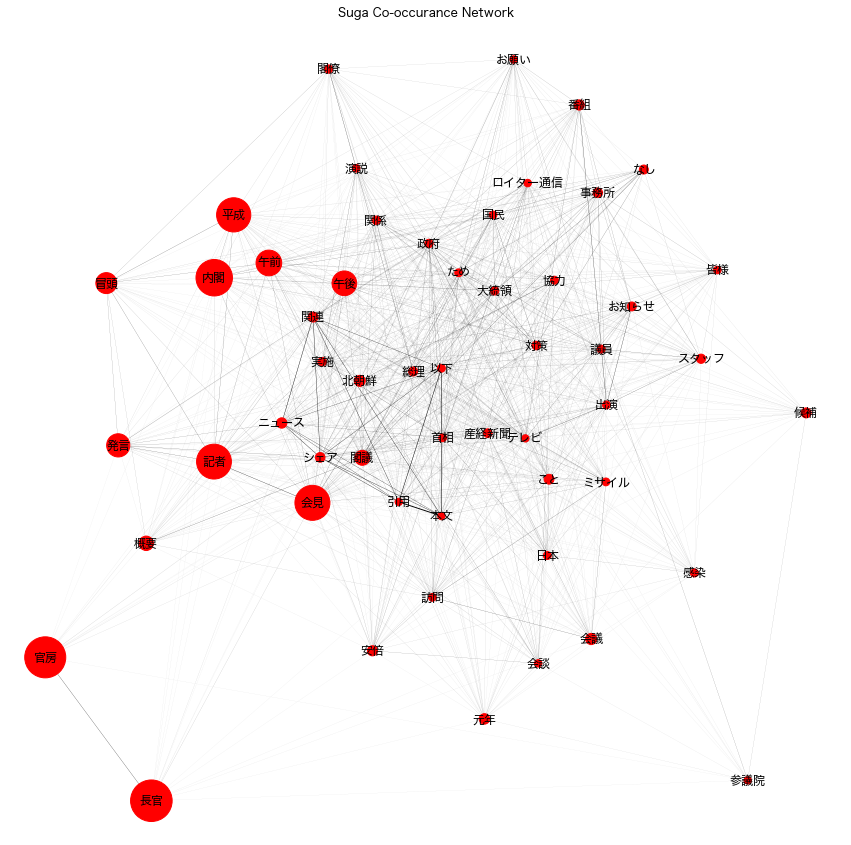

In [153]:
#Credit to Ito Eiji for reference. The darker the edge_color the greater the jaccard similarity between nodes. 

G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.15, iterations = 20)


node_size = [d['count'] for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='red', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Hiragino Sans')

edge_width = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=1, edge_color='black', width=edge_width)

plt.axis('off')
plt.title('Suga Co-occurance Network')
plt.show()